# 🎭 Detector de Emociones Faciales - Exploración de Datos

## Objetivo
En este notebook exploraremos el dataset **FER-2013** (Facial Expression Recognition) que contiene imágenes de rostros etiquetadas con 7 emociones diferentes.

## Dataset
- **Train**: ~28,000 imágenes
- **Test**: ~7,000 imágenes  
- **Emociones**: angry, disgust, fear, happy, sad, surprise, neutral
- **Tamaño**: 48x48 píxeles en escala de grises

## Pasos a seguir:
1. Importar librerías necesarias
2. Cargar y explorar la estructura del dataset
3. Visualizar ejemplos de cada emoción
4. Analizar la distribución de clases
5. Verificar el balance del dataset
6. Preparar datos para el modelo

In [3]:
# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento de imágenes
import cv2
from PIL import Image

# Sistema de archivos
import os
from pathlib import Path

# Utilidades
from collections import Counter
import random

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")
print(f"Versión de NumPy: {np.__version__}")
print(f"Versión de OpenCV: {cv2.__version__}")

✅ Librerías importadas correctamente
Versión de NumPy: 1.24.3
Versión de OpenCV: 4.8.1


## 📁 Exploración de la Estructura del Dataset

Vamos a verificar:
- Rutas de las carpetas
- Número de imágenes por conjunto (train/test)
- Categorías de emociones disponibles

In [6]:
# Definir rutas (subir un nivel desde Notebooks)
data_dir = Path('..') / 'data'
train_dir = data_dir / 'train'
test_dir = data_dir / 'test'

# Verificar que las rutas existan
print(f"📂 Ruta de datos: {data_dir.absolute()}")
print(f"¿Existe train?: {train_dir.exists()}")
print(f"¿Existe test?: {test_dir.exists()}\n")

# Obtener lista de emociones
emotions = sorted(os.listdir(train_dir))
print(f"🎭 Emociones detectadas: {emotions}\n")

# Contar imágenes por emoción en train
print("=" * 50)
print("CONJUNTO DE ENTRENAMIENTO")
print("=" * 50)
train_counts = {}
for emotion in emotions:
    emotion_path = train_dir / emotion
    count = len(os.listdir(emotion_path))
    train_counts[emotion] = count
    print(f"{emotion.capitalize():12} : {count:,} imágenes")

print(f"\n{'TOTAL':<12} : {sum(train_counts.values()):,} imágenes")

# Contar imágenes por emoción en test
print("\n" + "=" * 50)
print("CONJUNTO DE PRUEBA")
print("=" * 50)
test_counts = {}
for emotion in emotions:
    emotion_path = test_dir / emotion
    count = len(os.listdir(emotion_path))
    test_counts[emotion] = count
    print(f"{emotion.capitalize():12} : {count:,} imágenes")

print(f"\n{'TOTAL':<12} : {sum(test_counts.values()):,} imágenes")

📂 Ruta de datos: c:\Users\patri\OneDrive\Desktop\Portafolio Data Science\04 Detector de emociones\Notebooks\..\data
¿Existe train?: True
¿Existe test?: True

🎭 Emociones detectadas: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

CONJUNTO DE ENTRENAMIENTO
Angry        : 3,995 imágenes
Disgust      : 436 imágenes
Fear         : 4,097 imágenes
Happy        : 7,215 imágenes
Neutral      : 4,965 imágenes
Sad          : 4,830 imágenes
Surprise     : 3,171 imágenes

TOTAL        : 28,709 imágenes

CONJUNTO DE PRUEBA
Angry        : 958 imágenes
Disgust      : 111 imágenes
Fear         : 1,024 imágenes
Happy        : 1,774 imágenes
Neutral      : 1,233 imágenes
Sad          : 1,247 imágenes
Surprise     : 831 imágenes

TOTAL        : 7,178 imágenes


## 📊 Visualización de la Distribución de Datos

Crearemos gráficos para entender mejor el balance de clases en el dataset.

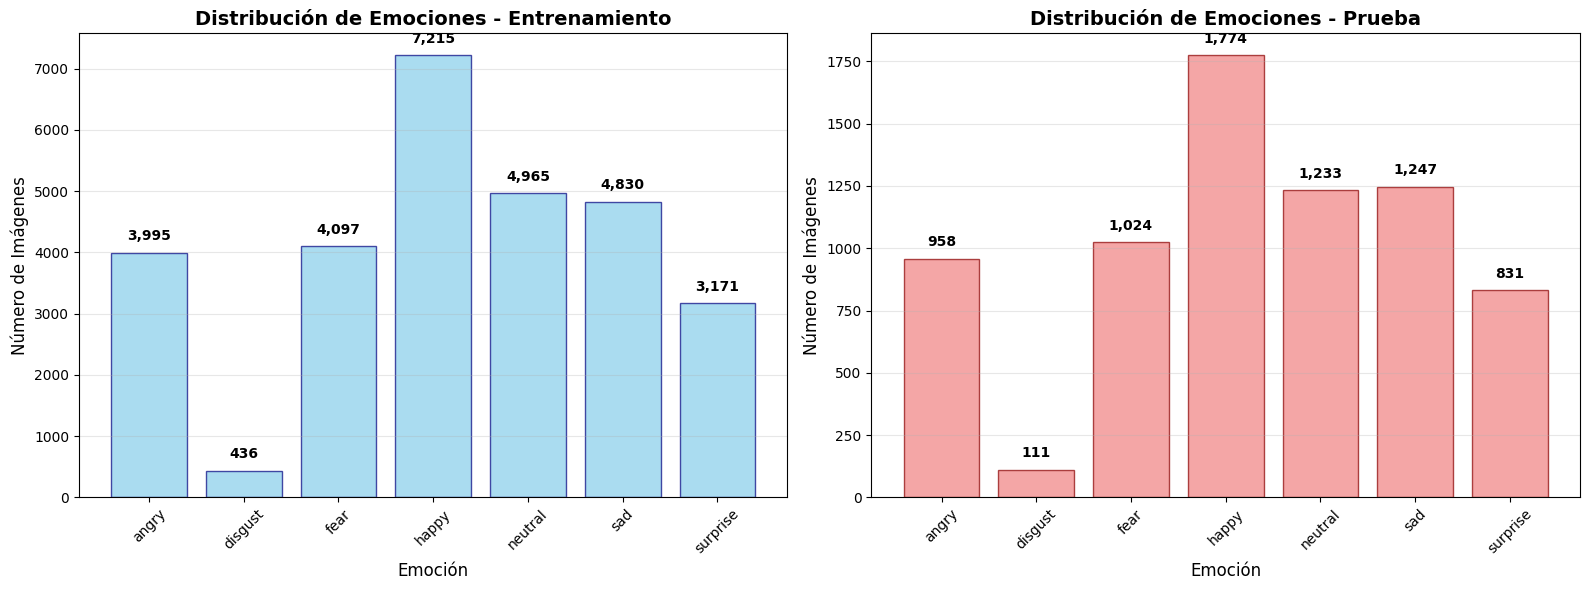


📈 ANÁLISIS DE BALANCE
Angry        : 13.92%
Disgust      :  1.52%
Fear         : 14.27%
Happy        : 25.13%
Neutral      : 17.29%
Sad          : 16.82%
Surprise     : 11.05%


In [7]:
# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Train
axes[0].bar(train_counts.keys(), train_counts.values(), color='skyblue', edgecolor='navy', alpha=0.7)
axes[0].set_title('Distribución de Emociones - Entrenamiento', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Emoción', fontsize=12)
axes[0].set_ylabel('Número de Imágenes', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, (emotion, count) in enumerate(train_counts.items()):
    axes[0].text(i, count + 200, f'{count:,}', ha='center', fontsize=10, fontweight='bold')

# Gráfico 2: Test
axes[1].bar(test_counts.keys(), test_counts.values(), color='lightcoral', edgecolor='darkred', alpha=0.7)
axes[1].set_title('Distribución de Emociones - Prueba', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Emoción', fontsize=12)
axes[1].set_ylabel('Número de Imágenes', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, (emotion, count) in enumerate(test_counts.items()):
    axes[1].text(i, count + 50, f'{count:,}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis de balance
print("\n📈 ANÁLISIS DE BALANCE")
print("=" * 50)
total_train = sum(train_counts.values())
for emotion, count in train_counts.items():
    percentage = (count / total_train) * 100
    print(f"{emotion.capitalize():12} : {percentage:5.2f}%")

## 🖼️ Visualización de Ejemplos de Imágenes

Vamos a mostrar ejemplos reales de cada emoción para entender cómo se ven los datos.

🎭 Mostrando ejemplos de imágenes del conjunto de entrenamiento...



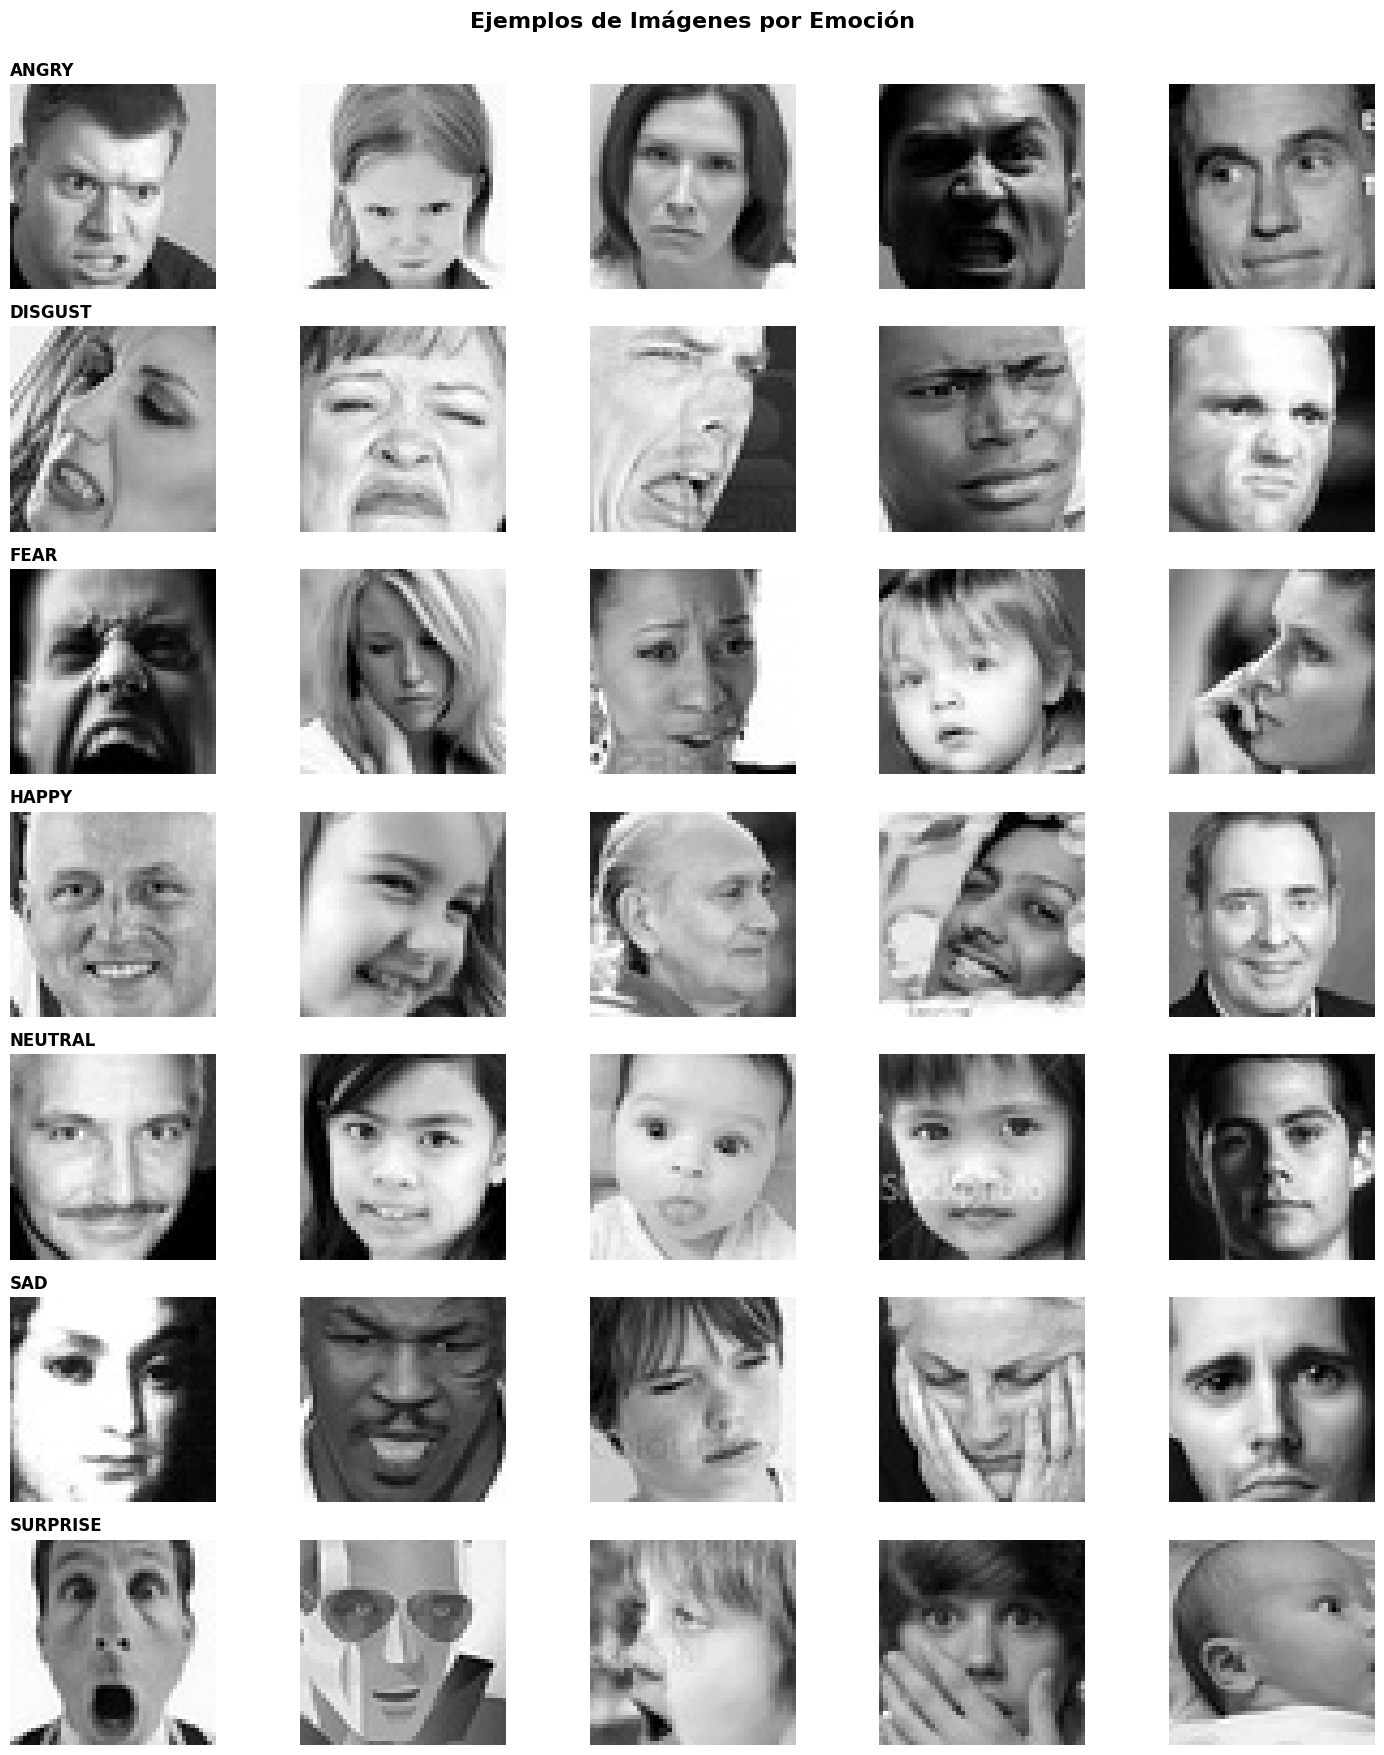

In [8]:
def show_sample_images(data_dir, emotions, samples_per_emotion=5):
    """
    Muestra imágenes de ejemplo para cada emoción
    """
    fig, axes = plt.subplots(len(emotions), samples_per_emotion, 
                             figsize=(15, 2.5 * len(emotions)))
    
    for i, emotion in enumerate(emotions):
        emotion_path = data_dir / emotion
        image_files = os.listdir(emotion_path)
        
        # Seleccionar imágenes aleatorias
        sample_images = random.sample(image_files, min(samples_per_emotion, len(image_files)))
        
        for j, img_file in enumerate(sample_images):
            img_path = emotion_path / img_file
            img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
            
            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].axis('off')
            
            if j == 0:
                axes[i, j].set_title(f'{emotion.upper()}', 
                                    fontsize=12, fontweight='bold', loc='left')
    
    plt.suptitle('Ejemplos de Imágenes por Emoción', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

# Mostrar ejemplos
print("🎭 Mostrando ejemplos de imágenes del conjunto de entrenamiento...\n")
show_sample_images(train_dir, emotions, samples_per_emotion=5)

## 🔍 Análisis de Propiedades de las Imágenes

Verificaremos:
- Dimensiones de las imágenes
- Rango de valores de píxeles
- Formato y características

🔍 Analizando propiedades de las imágenes...

📐 DIMENSIONES DE IMÁGENES
Formas únicas encontradas: {(48, 48)}
Forma estándar: (48, 48)

🎨 VALORES DE PÍXELES
Rango de valores: [0, 255]
Media: 128.82
Desviación estándar: 64.03


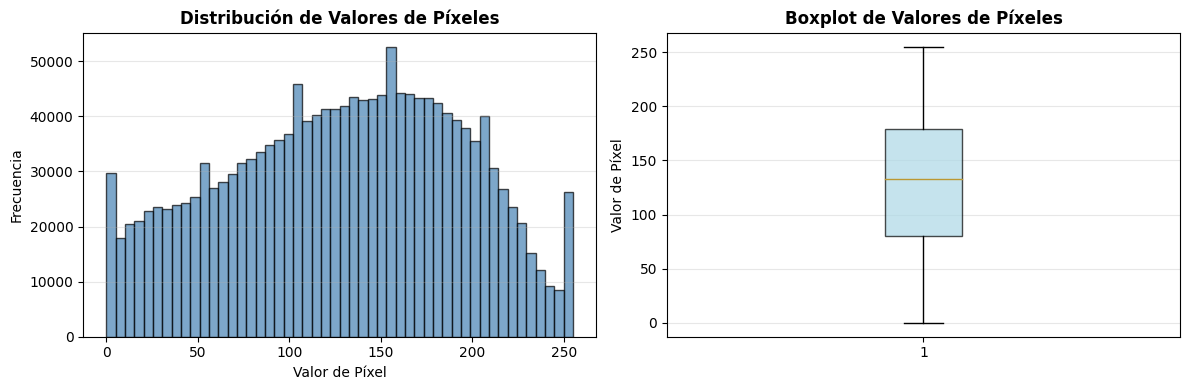

In [9]:
def analyze_image_properties(data_dir, emotions, num_samples=100):
    """
    Analiza las propiedades de una muestra de imágenes
    """
    shapes = []
    pixel_values = []
    
    for emotion in emotions:
        emotion_path = data_dir / emotion
        image_files = os.listdir(emotion_path)
        
        # Tomar muestra aleatoria
        sample_files = random.sample(image_files, min(num_samples, len(image_files)))
        
        for img_file in sample_files:
            img_path = emotion_path / img_file
            img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
            
            shapes.append(img.shape)
            pixel_values.extend(img.flatten())
    
    return shapes, pixel_values

# Analizar muestra de imágenes
print("🔍 Analizando propiedades de las imágenes...\n")
shapes, pixel_values = analyze_image_properties(train_dir, emotions, num_samples=100)

# Verificar dimensiones
unique_shapes = set(shapes)
print("📐 DIMENSIONES DE IMÁGENES")
print("=" * 50)
print(f"Formas únicas encontradas: {unique_shapes}")
print(f"Forma estándar: {shapes[0]}")

# Estadísticas de píxeles
pixel_array = np.array(pixel_values)
print(f"\n🎨 VALORES DE PÍXELES")
print("=" * 50)
print(f"Rango de valores: [{pixel_array.min()}, {pixel_array.max()}]")
print(f"Media: {pixel_array.mean():.2f}")
print(f"Desviación estándar: {pixel_array.std():.2f}")

# Visualizar distribución de píxeles
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(pixel_values, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de Valores de Píxeles', fontsize=12, fontweight='bold')
plt.xlabel('Valor de Píxel', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(pixel_values, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.title('Boxplot de Valores de Píxeles', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Píxel', fontsize=10)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 📋 Resumen de la Exploración

### Hallazgos Clave:
1. **Dataset moderadamente balanceado**: Happy tiene el doble de ejemplos que otras emociones, Disgust es muy escasa
2. **Imágenes estandarizadas**: Todas son 48x48 píxeles en escala de grises
3. **Rango de valores**: 0-255 (estándar para imágenes)
4. **Total**: 28,709 imágenes de entrenamiento y 7,178 de prueba
5. **Emociones**: 7 categorías distintas

### Próximos Pasos:
- **Preprocesamiento**: Normalizar píxeles (0-1), data augmentation
- **Arquitectura CNN**: Diseñar red convolucional apropiada
- **Manejo de desbalance**: Considerar pesos de clase para Disgust

### Observaciones:
- Happy (25%) y Disgust (1.5%) necesitan atención especial
- La calidad visual de las imágenes es buena
- Hay diversidad en edades, géneros y ángulos

In [10]:
# Crear DataFrame con información del dataset
dataset_info = pd.DataFrame({
    'Emoción': list(train_counts.keys()),
    'Train': list(train_counts.values()),
    'Test': list(test_counts.values())
})

dataset_info['Total'] = dataset_info['Train'] + dataset_info['Test']
dataset_info['% Train'] = (dataset_info['Train'] / dataset_info['Train'].sum() * 100).round(2)

print("\n📊 RESUMEN COMPLETO DEL DATASET")
print("=" * 70)
print(dataset_info.to_string(index=False))
print("=" * 70)

# Guardar información
dataset_info.to_csv('../data/dataset_info.csv', index=False)
print("\n✅ Información guardada en 'data/dataset_info.csv'")

print("\n" + "=" * 70)
print("🎉 EXPLORACIÓN COMPLETADA")
print("=" * 70)
print("Ahora estamos listos para construir y entrenar nuestro modelo CNN")
print("Continúa con: 02_entrenamiento_modelo.ipynb")


📊 RESUMEN COMPLETO DEL DATASET
 Emoción  Train  Test  Total  % Train
   angry   3995   958   4953    13.92
 disgust    436   111    547     1.52
    fear   4097  1024   5121    14.27
   happy   7215  1774   8989    25.13
 neutral   4965  1233   6198    17.29
     sad   4830  1247   6077    16.82
surprise   3171   831   4002    11.05

✅ Información guardada en 'data/dataset_info.csv'

🎉 EXPLORACIÓN COMPLETADA
Ahora estamos listos para construir y entrenar nuestro modelo CNN
Continúa con: 02_entrenamiento_modelo.ipynb
